In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900)

#u.bin(rbinmax=240, drbin=10)

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14



In [3]:
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), loadfile=True, plot=False)
#u.fitlines(sys_vel=20, lines0= np.array([9069, 6312]), loadfile=False, plot=True)

Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '6731' '6717' '6584' '6563' '6548' '6312'
 '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729' '3726']


In [4]:
u.runpyneb(niter=2, bin=False, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:270: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:289: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:306: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:325: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:342: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:360: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:374: RuntimeWarning: Mean of empty 

In [5]:
print(u.linefitdict['delta_ra'].flatten().shape)
print(u.linefitdict['delta_dec'].flatten().shape)
print(u.linefitdict['TeS3'].flatten().shape)

(169,)
(169,)
(169,)


(156,)
(156, 1)
(156, 1)


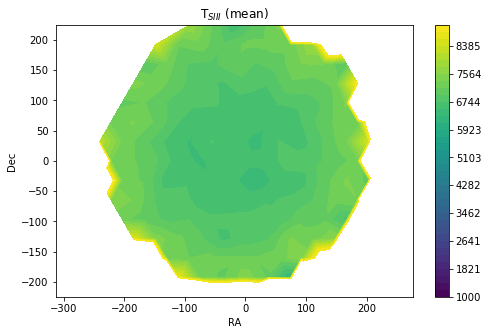

In [7]:
u.plotmap(u.linefitdict['TeS3'], 1000, 9000, title=r'T$_{SIII}$ (mean)', output=u.datadir+u.simname+'/'+u.simname+'_plotmaps'+'/')
